 # Práctica Guiada 2.
 ----
  
  Universidad : UTEC \\
  Curso       : Inteligencia Artificial \\
  Profesor    : Cristian López Del Alamo \\
  Tema        : Regresión Lineal Múltiple \\
  

 ----




1.  En esta práctica se pide realizar pruebas utilizando   diferentes funciones de pérdida.

2.  Su equipo debe implementar el algoritmo de machine learning para  regresión lineal múltiple y realizar las correspondientes pruebas usando el siguiente  [Dataset](
https://docs.google.com/spreadsheets/d/10wC32tLXK9xHfsQ6DuDSQIqEi4qPLogfThHwATvVgpc/edit?usp=sharing
).  

3. MSE Loss Function \\

  $MSE = \frac{1}{2m}\sum_{i=0}^m (y_i - h(x_i))^2$

4. Utilize todo los datos del dataset para entrenar  y grafique el plano que mejor separa a los datos. [Help](https://stackoverflow.com/questions/36060933/matplotlib-plot-a-plane-and-points-in-3d-simultaneously)

Importante: No se olvide de normalizar los datos entre cero y uno, por cada columna.





In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


Crear el DataSet







In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv('db.csv')
X = dataset[["Year","Population"]]
Y = dataset["Employed"]

min_vals = X.min(axis=0)
max_vals = X.max(axis=0)

X_normalized = (X - min_vals) / (max_vals - min_vals)
#se anade una columna de 1s para el +b
X["Ones"] = 1
X_normalized["Ones"] = 1

In [80]:
print(X_normalized)

        Year  Population  Ones
0   0.000000    0.000000     1
1   0.066667    0.045566     1
2   0.133333    0.096338     1
3   0.200000    0.147777     1
4   0.266667    0.198772     1
5   0.333333    0.251947     1
6   0.400000    0.333111     1
7   0.466667    0.383171     1
8   0.533333    0.435189     1
9   0.600000    0.495083     1
10  0.666667    0.571219     1
11  0.733333    0.638188     1
12  0.800000    0.701197     1
13  0.866667    0.790282     1
14  0.933333    0.900814     1
15  1.000000    1.000000     1


# Modelo

Nota: Antes añadir Añadir una columna de nx1 a X con valor 1.

$h(X) = X*W^t$

$h(x_i) = x_{i1}w_1 + x_{i2}w_2 + b$



In [90]:

def h(X, W):
  
  X = np.array(X)
  W = np.array(W)

  return  np.dot(X,W.T)


# Loss function
Nota: La función de pérdida no cambia, solo la llamada a la función h
$\mathcal{L} =  ||Y - XW^t||_2^2$

$\mathcal{L} = \frac{1}{2n}\sum_{i=0}^n (y_i - h(x_i))^2$



In [122]:
def Error(X, W,Y):
  Y = np.array(Y)
  # Y_pred = h(X,W)
  # e = Y - Y_pred
  # return np.dot(e,e.T)/(2*len(Y))
  return np.mean((Y - h(X,W))**2)/2


In [106]:
W = np.random.random(X.shape[1])
# print(h(X,W).shape)
print(W.shape)
# print(Error(X,Y,W))
# print(((Y - h(X,W))**2).shape)
Error(X,W,Y)

(3,)


708483.3022636868

# Cálculo de derivadas
Nota: Intente resolver este algoritmo desde un punto de vista matricial.

$dw_j = \frac{1}{m}\sum_{i=0}^m(y_i - h(x_i))(-x_{ij})$

In [129]:
def derivada(X, W, Y):
    # write your code here
    # Y_pred = h(X,W)
    # e = Y - Y_pred
    # return np.matmul(e.T,-X)/len(Y)
    return np.matmul((Y - h(X,W)).T,-X)/len(Y)



# Actualiación de parámetros

Recuerde: $\frac{\partial L}{\partial w}$ representa un vector con todas las derivadas de la función de pérdida con rescto a W.

$W  = W - \alpha*\frac{\partial L}{\partial W} $



In [130]:
def update(W, alpha,dw):

 W = W - alpha*dw
 
 return W



# Training

In [131]:
def train(X, Y, epochs, alfa):
    W = np.random.random(X.shape[1])
    L = Error(X,W,Y)
    loss = []
    for i in range(epochs):
        dW = derivada(X, W, Y)
        W = update(W,alfa, dW)
        L = Error(X, W,Y)
        loss.append(L)
        if ((i%1000)==0):
          print("loss value error :" + str(L))
    return W, loss



def Plot_Loss(epochs,loss):
   plt.plot(epochs, loss)


In [132]:


# Imprimir la matriz X normalizada
# print(X_normalized)

W_new, loss_new = train(X_normalized,Y,20000,0.001)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_20100\3639718874.py:6: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  return np.matmul((Y - h(X,W)).T,-X)/len(Y)


loss value error :2035.1468813489073
loss value error :141.99698510001176
loss value error :39.433022079000715
loss value error :27.390314800493684
loss value error :21.33999543986243
loss value error :16.77117886483225
loss value error :13.203234355320856
loss value error :10.410858752434804
loss value error :8.225163982526672
loss value error :6.514323828565037
loss value error :5.175170807912002
loss value error :4.126952428311194
loss value error :3.3064604653154244
loss value error :2.6642192659160258
loss value error :2.1615022187464037
loss value error :1.7679964256268534
loss value error :1.4599747448356393
loss value error :1.2188649748293527
loss value error :1.030129895985453
loss value error :0.8823906335967662


Year           8.905921
Population     4.841687
Ones          58.557141
dtype: float64


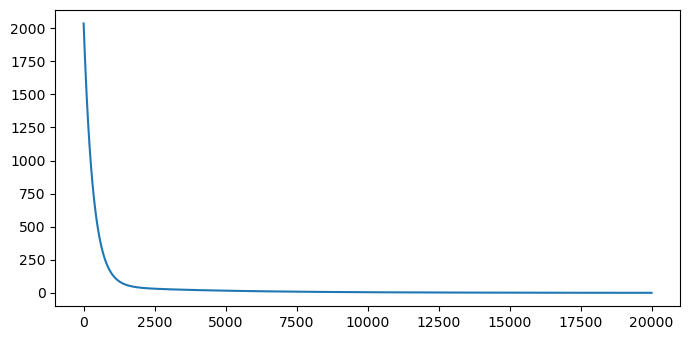

In [135]:
print(W_new)
# print(loss_new)
Plot_Loss(range(len(loss_new)),loss_new)

In [134]:
### Plot plane example
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

x, y = np.meshgrid(x, y)
# ecuacion del plano: x_1w_1 + x_2w_2 + b

eq = 0.1 * x + 40 * y + 100.09

fig = plt.figure()

ax = fig.gca(projection='3d')

ax.plot_surface(x, y, eq)

plt.show()

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 700x350 with 0 Axes>

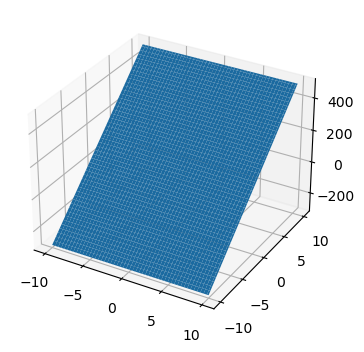

In [136]:
### Plot plane example
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

x, y = np.meshgrid(x, y)
# ecuacion del plano: x_1w_1 + x_2w_2 + b
eq = 0.1 * x + 40 * y + 100.09

# Crear una figura tridimensional desde el principio
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, eq)

plt.show()

# Testing

In [104]:
# Change the values of umbral and alpha and try to obtain a good result

W = train(x, y, 1000,  0.001)



loss value error :[[ 56.3265693   57.39867215  58.47077501 ... 160.32054643 161.39264929
  162.46475215]
 [ 57.39867215  58.49118109  59.58369003 ... 163.37203915 164.46454809
  165.55705702]
 [ 58.47077501  59.58369003  60.69660505 ... 166.42353186 167.53644688
  168.6493619 ]
 ...
 [160.32054643 163.37203915 166.42353186 ... 456.31533981 459.36683253
  462.41832524]
 [161.39264929 164.46454809 167.53644688 ... 459.36683253 462.43873132
  465.51063012]
 [162.46475215 165.55705702 168.6493619  ... 462.41832524 465.51063012
  468.602935  ]]


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_20100\2425746741.py:5: RuntimeWarning: overflow encountered in matmul
  return np.matmul(e.T,-X)/len(Y)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_20100\2278798050.py:6: RuntimeWarning: invalid value encountered in subtract
  W = W - alpha*dw
